In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
originData = pd.read_csv('DiurnalTravelDistributions.csv')
data = pd.read_csv('DiurnalTravelDistributions.csv')

In [2]:
max_index = data['Pro'].idxmax()
print(max_index)

18149


In [3]:
from scipy.interpolate import interp1d

# mask = (data['T'] > 7* 2400) & (data['T'] <= 8 * 2400)
# data.loc[mask, 'Pro'] *= 0.9
# mask = (data['T'] > 8* 2400) & (data['T'] <= 9 * 2400)
# data.loc[mask, 'Pro'] *= 0.8
# mask = (data['T'] > 9* 2400) & (data['T'] <= 16 * 2400)
# data.loc[mask, 'Pro'] *= 0.5

# mask = (data['T'] > 16 * 2400) & (data['T'] <= 20 * 2400)
# data.loc[mask, 'Pro'] *= 1.2

# 计算平滑值
data['Smoothed_Pro'] = data['Pro'].rolling(window=3600, center=True).mean()

# 插值填充边界
x = data['T'][~data['Smoothed_Pro'].isna()]
y = data['Smoothed_Pro'][~data['Smoothed_Pro'].isna()]
f_interp = interp1d(x, y, fill_value="extrapolate")
data['Smoothed_Pro'] = f_interp(data['T'])

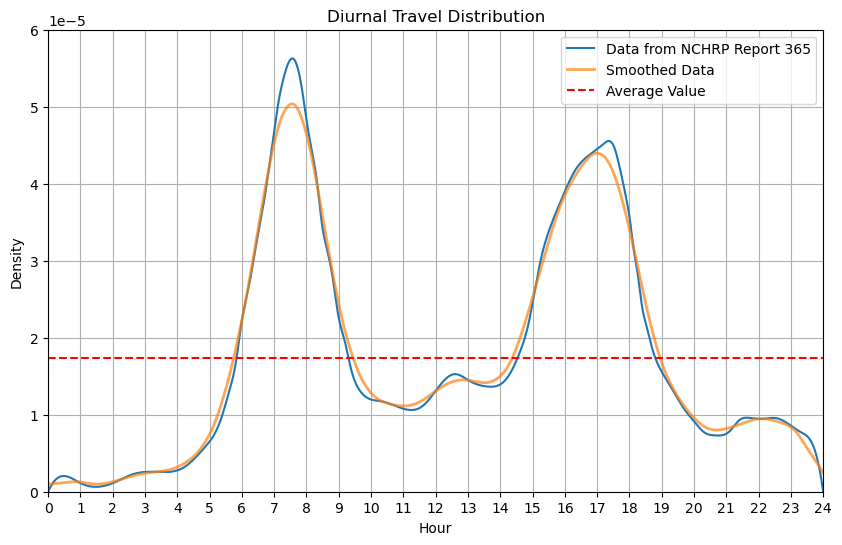

In [7]:
def convert_seconds_to_time(seconds):
    hour = (seconds / 2400)
    return hour

tranT = [convert_seconds_to_time(t) for t in data['T']]
scale = data['Smoothed_Pro'].sum()

data['Smoothed_Pro'] /= scale
average_value = data['Smoothed_Pro'].mean()

# Plot the original and smoothed data for comparison
plt.figure(figsize=(10, 6))
plt.plot(tranT, originData['Pro'], label='Data from NCHRP Report 365')
plt.plot(tranT, data['Smoothed_Pro'], label='Smoothed Data', alpha=0.7, linewidth=2)
plt.axhline(y=average_value, color='red', linestyle='--', label='Average Value')
plt.xlabel('Hour')
plt.ylabel('Density')
hours = [h for h in range(25)]
ticks = [convert_seconds_to_time(h * 2400) for h in hours]
plt.xlim(0, 24)
plt.ylim(0, 6e-5)
plt.xticks(ticks)
plt.title('Diurnal Travel Distribution')
plt.legend()
plt.grid(True)
plt.show()

In [5]:
data = data[['T', 'Smoothed_Pro']]
data.to_csv('DemandTimeDistribution_Smoothed.csv', index=False)
print(data['Smoothed_Pro'].sum())

0.9999999999999999


In [6]:
originData['Pro'].sum()

0.9999999999999999